[View in Colaboratory](https://colab.research.google.com/github/omarsar/google_colab_wordcloud/blob/master/Wordcloud.ipynb)

# Building Your First Wordcloud with Google Colaboratory and Python

The goal of this tutorial is to teach you how to create a word cloud using Python and Google Colaboratory (Colab). You will learn how to leverage the free storage provided by Google Drive and the powerful, free programming environment of Google Colab. 

This is just a very simple use-case demonstrating how you can take advantage of Colab notebooks and Google Drive for implementing your data science projects - all for free. After this tutorial, you should be able to work on solving real life data science problems without the need to manage a computing environment. The best part is that you will also get to share your projects with the world with just the click of a button. Let's get started!

## Requirements
1. First, you will need a Google account to access both Google Colab and Google Drive. Colab notebooks are stored directly on your Google Drive. 

2. You will also need a text file for which you want to generate a word cloud. Make sure to upload your desired text file with extension `.txt` into your Google Drive, preferably in the same folder where you are storing your Colab notebooks.

## Steps
Before you begin, here is a list of the tasks you will be working on:
- Import the necessary python libraries to run your code successfully
- Read your own files to the Colab environment from Google Drive
- Perform a few statistics on the imported file
- Generate a word cloud with the `wordcloud` library
- Bonus: Generate a masked word cloud of your choice

## Importing Main Libraries
Google Colaboratory automatically installs some of the common python packages for you, but there may be cases where you will need to install your own libraries such as the `wordcloud` library which we will use to generate word clouds. You can directly install packages within the Colab notebook with the `!pip install package_name` command as follows:

In [2]:
!pip install wordcloud

    100% |████████████████████████████████| 348kB 7.3MB/s 


Now you can import the necessary libraries you will need to create your first word cloud:



In [0]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

## Connecting Colab with Google Drive

To create the word cloud, you need a text file, which you can upload directly to Google Drive, and import it to the Colab environment. The function below does that for you:

In [0]:
def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service

When you run the command below, you will be provided a link that will authenticate your account and request access to your Google Drive.

In [0]:
drive_service = google_authenticate()

## Read a Text File into Colab

After authenticating your Google Drive, now you can import text files and operate on them directly through Colab.

The function below allows you to read the text file which you will use to create the  word cloud:

In [0]:
def read_file(file_id):
  """ 
  Download file from Google Drive 
  Argument: file_id
  Returns: downloaded file
  """
  
  file_id = file_id

  import io
  from googleapiclient.http import MediaIoBaseDownload

  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = downloader.next_chunk()

  downloaded.seek(0)
  return downloaded
  #print 'Downloaded file contents are:', downloaded.read()

Before you run the command that follows, you should have already imported your text file into Google Drive. Once you have the file stored on your Google Drive, all you need to do now is to copy the file id from the picture's shareable link. In the animation below, I demonstrate how to obtain the `file id` (the ending portion of the shareable link):

<img src="https://paper.dropbox.com/ep/redirect/image?url=https%3A%2F%2Fd2mxuefqeaa7sj.cloudfront.net%2Fs_3318666F95F58ECB4DEA03EAE0F2752E80FDA8329A3A3D544291F4C7AC26E671_1534094950795_Colab%2BNotebooks%2B-%2BGoogle%2BDrive%2B2.gif&hmac=8qmthQIzmAD8IRIJdJStom97X2A7BhAwoWVdkiwW8pE%3D" alt="Drawing" />

Then you just pass the file_id to the read_file function as shown below:

In [0]:
text_file = read_file('1NrodQrpaw-9xU2lCYo8H8fiW6A1RGdwt') # file id of the picture

## Read the File and Inspect it

Once you have successfully read the text file to the Colab environment, you are now ready to start exploring the text file and generate your first word cloud. 

First, we explore the text file to see what it contains:

In [8]:
document = text_file.read()
print(len(document))
print(document[0:100])

148570
﻿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the u


## Generating Word Cloud

Then you can generate the word cloud as follows:

(-0.5, 399.5, 199.5, -0.5)

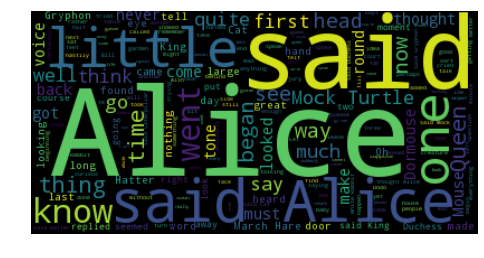

In [17]:
wordcloud = WordCloud().generate(document)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Generate A Masked Wordcloud

With the wordcloud library you can also generate customized word clouds based on an image silhouette. These type of clouds are also called masked word clouds. To do this, you will first need to upload a silhouette image of your choice to Google Drive. Then you can get the file id from the shareable link similar to what we did for our text file (see animation above). You can get a silhouette image directly from [Google Images](https://www.google.com.bz/search?biw=1366&bih=662&tbm=isch&sa=1&ei=tHFwW_zIEYKd5gLK_pGwBw&q=silhouette&oq=silhouette&gs_l=img.4..0i67k1l2j0l7j0i67k1.2247.3927.0.4957.10.9.1.0.0.0.334.507.0j1j0j1.2.0....0...1c.1.64.img..7.3.540...0i7i30k1.0.737ervYAtE4).

The code below takes care of generating the masked word cloud:

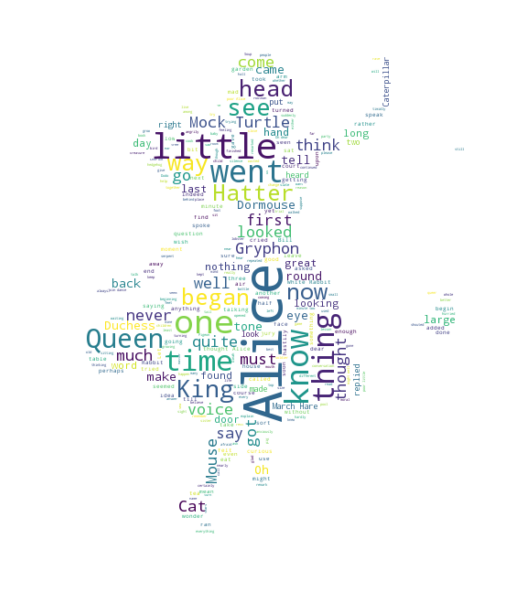

In [9]:
image_file = read_file("1kHhmo4fj5PqhpH2x_hVY6uUDgf2_G0Tn")

# create mask
alice_mask = np.array(Image.open(image_file))

# remove stopwords
stopwords = set(STOPWORDS)
stopwords.add("said")

# generate word cloud
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords)
wc.generate(document)

# plot the word cloud
plt.figure(figsize=(8,6), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

That's it for word clouds for now. If you went through the entire tutorial I congratulate you for that. Hopefully, you are now more open to using Google Colab and have realized how powerful this tool can be, and how it can help you with developing your own data science projects in the future.

## References
- Word Cloud Python Library: https://github.com/amueller/word_cloud